In [28]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Settings for seaborn
sns.set_theme(style="ticks", palette="pastel")

# ANOVA

## 1. Data Import

In [29]:
#Get Data
df_raw_data = pd.read_csv('../05_Feature Selection & Engineering/dataset_tweets_featured.csv', sep=',', encoding='utf-8')

#Size, Number of Columns
print(df_raw_data.shape)
print(df_raw_data.dtypes)

(64344, 22)
interaction_id             int64
tweet_id                   int64
senderuser_id              int64
receiveruser_id            int64
cyberbullying_type        object
interaction_timestamp     object
char_count                 int64
tweet_text                object
harass                   float64
cyberstalk               float64
flaming                  float64
outing                   float64
doxing                   float64
exclusion                float64
impersonation            float64
trolling                 float64
hateSpeech               float64
threats                  float64
word_count                 int64
avg_word_length          float64
avg_sentence_length      float64
punctuation_count          int64
dtype: object


## 2. Print example Data

In [30]:
# Show values for 'Kantonskürzel'
print(df_raw_data['cyberbullying_type'].value_counts())

cyberbullying_type
none                   11458
religion                7982
age                     7960
gender                  7946
ethnicity               7942
not_cyberbullying       7923
other_cyberbullying     7797
sexism                  3369
racism                  1965
Name: count, dtype: int64


## Crate Pivot Table of mean char_count per Cyberbullying Type

In [31]:
table = pd.pivot_table(df_raw_data, 
                       values='char_count',
                       columns=['cyberbullying_type'], 
                       aggfunc=np.mean)
print(table)

cyberbullying_type         age   ethnicity      gender       none  \
char_count          173.417211  139.373583  136.404984  89.287136   

cyberbullying_type  not_cyberbullying  other_cyberbullying      racism  \
char_count                  83.126215            85.733231  121.397455   

cyberbullying_type    religion      sexism  
char_count          197.974944  101.558326  


/var/folders/y8/blsng9yn0_jdwkc6k9fx0f240000gn/T/ipykernel_29816/1162707375.py:1: FutureWarning: The provided callable <function mean at 0x107470180> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df_raw_data,


## 4. Create grouped boxplot (groups=Cyberbullying-Type, values=char-count)

In [36]:
# Select only numeric columns for aggregation
numeric_columns = df_raw_data.select_dtypes(include='number').columns

# Preparation
# Extract three of the lowest char count cyberbullying types and three of the highest ones.
df_aggregatedMeans = df_raw_data.groupby('cyberbullying_type')[numeric_columns].agg('mean')

df_largest = df_aggregatedMeans.nlargest(3, ['char_count'])
df_smallest = df_aggregatedMeans.nsmallest(3, ['char_count'])

print("List of the highest char count cyberbullying types: ", df_largest.index.tolist())
print("List of the lowest char count cyberbullying types: ", df_smallest.index.tolist())

List of the highest char count cyberbullying types:  ['religion', 'age', 'ethnicity']
List of the lowest char count cyberbullying types:  ['not_cyberbullying', 'other_cyberbullying', 'none']


## 4.1 Boxplot without outliers

/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


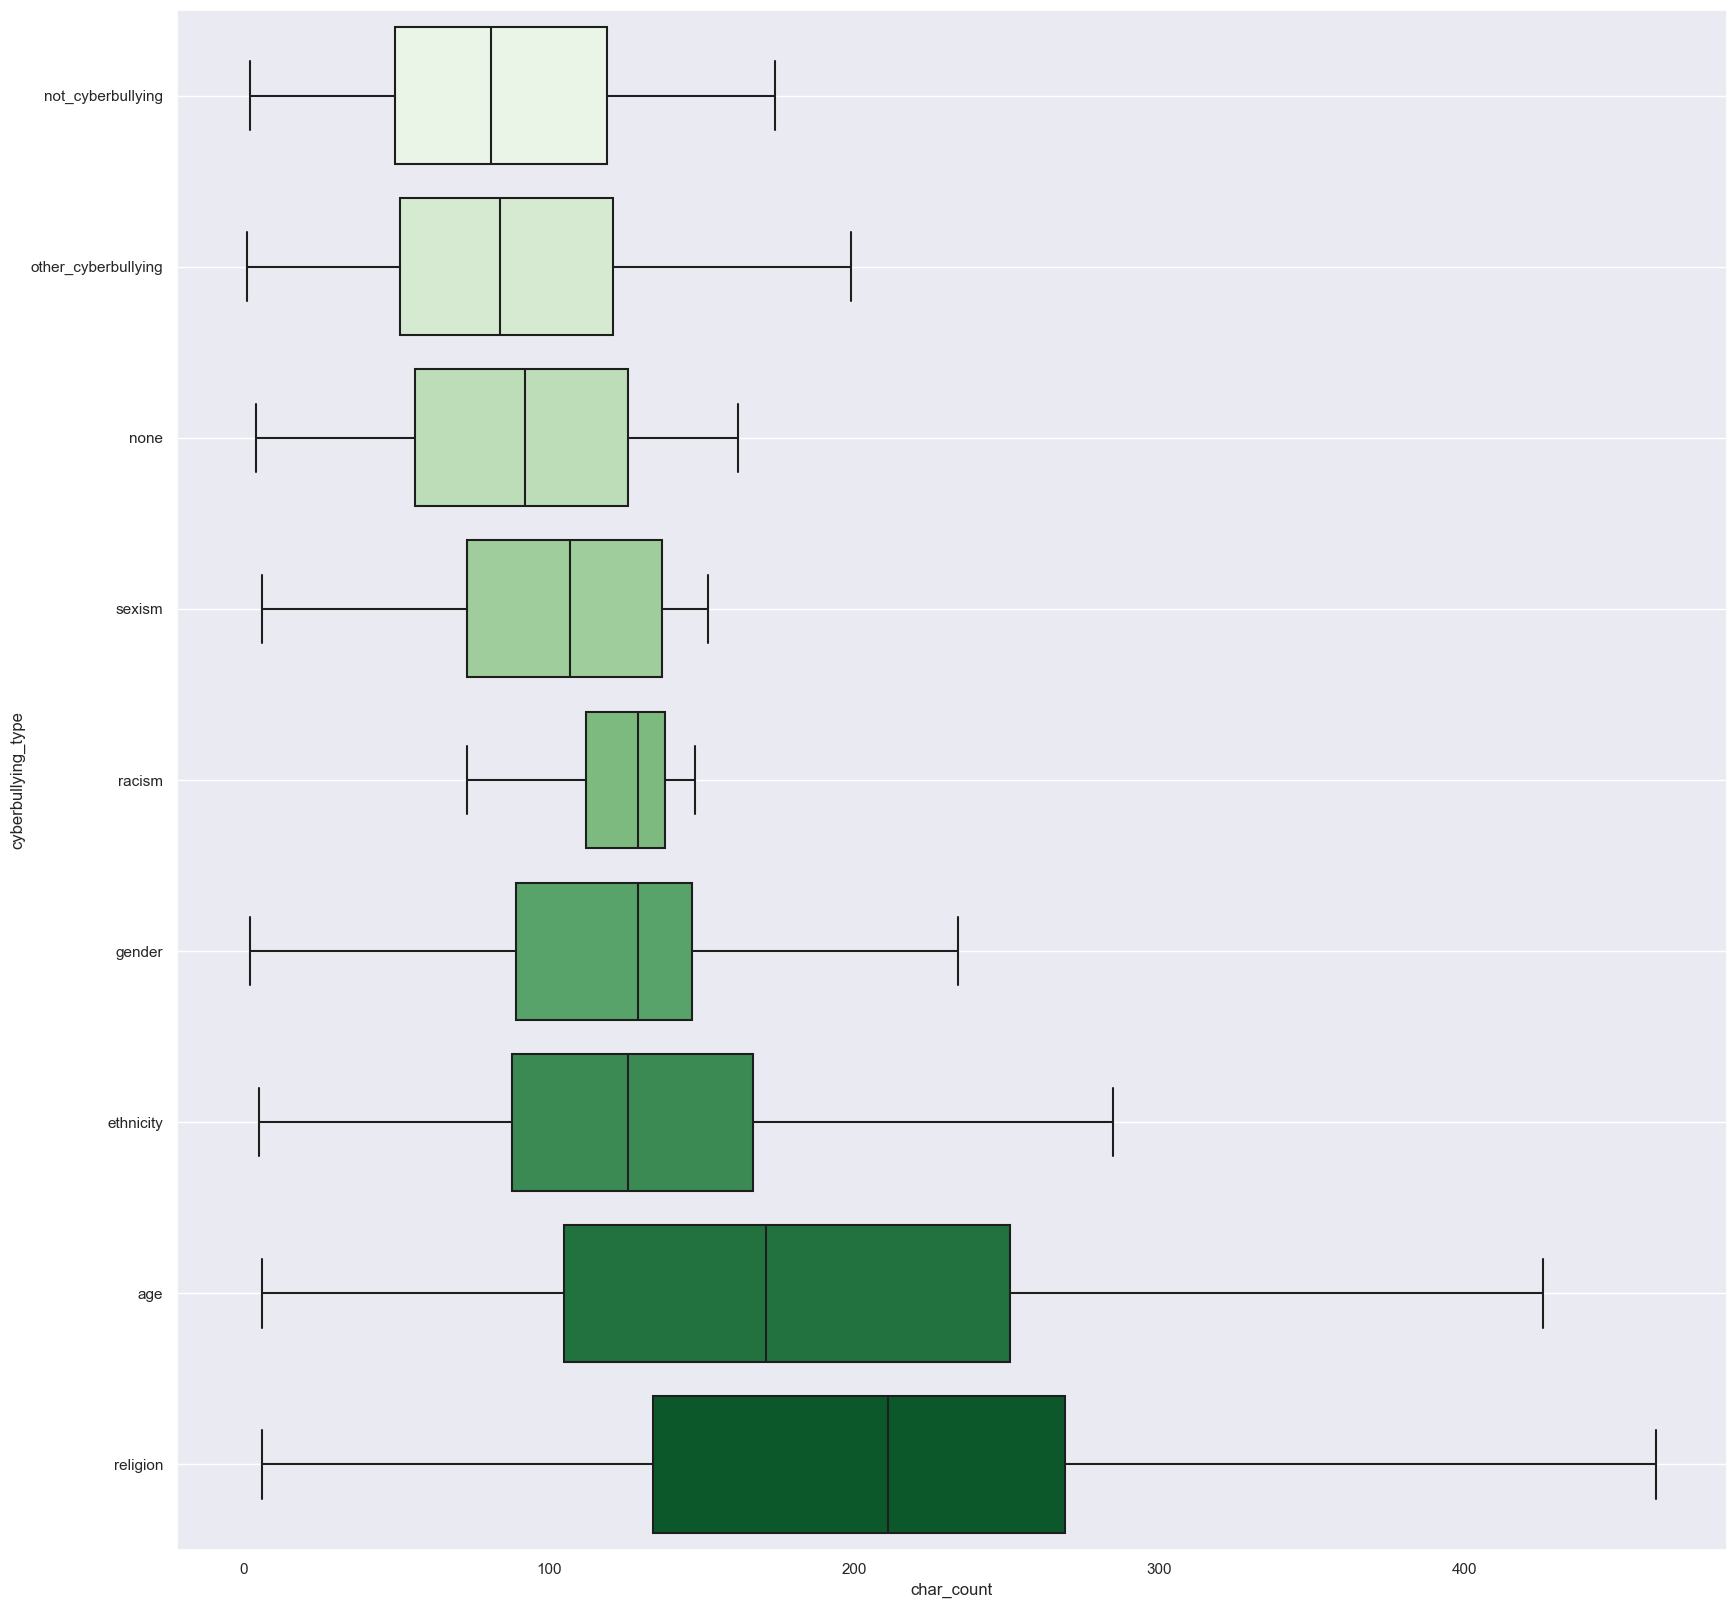

In [41]:
# Select only numeric columns for aggregation
numeric_columns = df_raw_data.select_dtypes(include='number').columns

# Group by 'cyberbullying_type' and calculate the mean of numeric columns
df_sorted = df_raw_data.groupby('cyberbullying_type')[numeric_columns].mean()

# Sort cyberbullying types based on mean 'char_count'
df_sorted = df_sorted.sort_values(by=['char_count']).index

# Plot boxplot with groups
plt.figure(figsize=(20, 20))
sns.set(style="darkgrid")
ax = sns.boxplot(x="char_count",
                 y="cyberbullying_type",
                 palette="Greens",
                 data=df_raw_data,
                 order=df_sorted,
                 orient='h', showfliers=False)
plt.grid()
plt.show()


## 5. ANOVA
**H1**: The mean character amount differs between different bullying types.<br /><br />
**H0**: The mean character amount **does not** differ between different bullying types.<br /><br />

In [43]:
# Create subsets (groups)
religion = df_raw_data.loc[df_raw_data['cyberbullying_type'] == 'religion']
age = df_raw_data.loc[df_raw_data['cyberbullying_type'] == 'age']
gender = df_raw_data.loc[df_raw_data['cyberbullying_type'] == 'gender']
ethnicity = df_raw_data.loc[df_raw_data['cyberbullying_type'] == 'ethnicity']
not_cyberbullying = df_raw_data.loc[df_raw_data['cyberbullying_type'] == 'not_cyberbullying']
other_cyberbullying = df_raw_data.loc[df_raw_data['cyberbullying_type'] == 'other_cyberbullying']
sexism = df_raw_data.loc[df_raw_data['cyberbullying_type'] == 'sexism']
racism = df_raw_data.loc[df_raw_data['cyberbullying_type'] == 'racism']

# Create ANOVA
fvalue, pvalue = stats.f_oneway(religion['char_count'],
                                age['char_count'],
                                gender['char_count'],
                                ethnicity['char_count'],
                                not_cyberbullying['char_count'],
                                other_cyberbullying['char_count'],
                                sexism['char_count'],
                                racism['char_count'])



# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(200))

F-value: 2500.509 p-value 0.0


## 5.1 Interpretation of results

**H1**: The mean character amount differs between different bullying types.<br /><br />
**H0**: The mean character amount **does not** differ between different bullying types.<br /><br />

Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the characteristic count of tweets differ between the cyberbullying types. From the t-test above, it is not clear which type is higher or lower. It only shows that there is a statistically significant (5% significance level) difference.